In [1]:
import jax
import jax.numpy as jnp
from consensus import *

In [2]:
key = jax.random.PRNGKey(0)
config = ConsensusConfig()

In [3]:
key, subkey = jax.random.split(key)

adj_mat = generate_random_adjacency_matrix(subkey, config)

key, subkey = jax.random.split(key)


initial_state = generate_random_agent_states(subkey, config)

In [4]:
jnp.linalg.norm(adj_mat, axis=1, keepdims=True, )

Array([[1.4142135],
       [1.4142135],
       [1.7320508],
       [1.7320508],
       [1.7320508]], dtype=float32)

In [5]:
initial_state

Array([[-0.79141927, -0.31202483, -0.73786545,  0.6202612 , -0.6111777 ],
       [ 0.27104306,  0.65300965, -0.09737301, -0.7656326 ,  0.05701613],
       [-0.9213977 , -0.69550824,  0.69740653, -0.00249243,  0.01338029],
       ...,
       [ 0.934633  , -0.4459145 ,  0.7428684 , -0.5317199 ,  0.9887655 ],
       [ 0.5390346 , -0.48631144,  0.1265409 , -0.08987975, -0.11147618],
       [-0.900332  , -0.08470678,  0.72673416, -0.75884247,  0.8060036 ]],      dtype=float32)

In [6]:
out = run_consensus_sim(adj_mat, initial_state, config)

In [7]:
outputs = []
from tqdm import tqdm

for i in tqdm(range(config.num_sims)):
    key, subkey = jax.random.split(key)

    adj_mat = generate_random_adjacency_matrix(subkey, config)

    key, subkey = jax.random.split(key)

    initial_state = generate_random_agent_states(subkey, config)

    trajectories = run_consensus_sim(adj_mat, initial_state, config)

    outputs.append(trajectories)



100%|██████████| 500/500 [00:01<00:00, 379.65it/s]


In [8]:
len(outputs)

500

In [9]:
x = outputs[1]

In [10]:
x

Array([[[-1.66636720e-01,  5.12272954e-01, -7.18595386e-01,
         -6.62203312e-01,  5.40143251e-01],
        [-1.74384415e-01,  4.56314355e-01, -6.64573908e-01,
         -6.39672816e-01,  5.08012652e-01],
        [-1.80595487e-01,  4.05365229e-01, -6.15751922e-01,
         -6.18524671e-01,  4.76983011e-01],
        ...,
        [-1.59010112e-01, -1.50679022e-01, -1.53786018e-01,
         -1.67208239e-01, -1.54014796e-01],
        [-1.58967257e-01, -1.50819257e-01, -1.53847516e-01,
         -1.66839033e-01, -1.54245734e-01],
        [-1.58922747e-01, -1.50957853e-01, -1.53907120e-01,
         -1.66481182e-01, -1.54461235e-01]],

       [[-2.95487672e-01,  2.00281173e-01,  7.41982460e-01,
         -6.08857512e-01, -5.24303138e-01],
        [-2.84227967e-01,  2.24914923e-01,  6.94133639e-01,
         -5.94611228e-01, -5.13903916e-01],
        [-2.74258196e-01,  2.46254981e-01,  6.50272310e-01,
         -5.80505908e-01, -5.03451347e-01],
        ...,
        [-9.05691609e-02,  2.4682218

In [11]:
x.shape

(500, 100, 5)

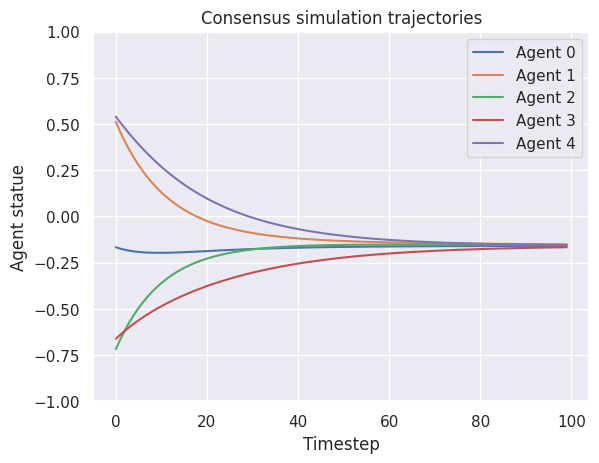

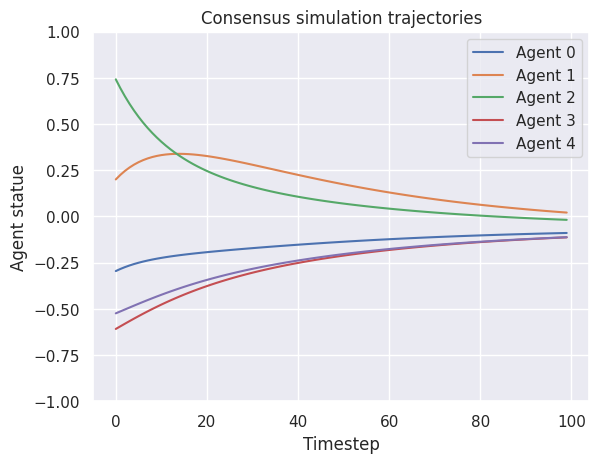

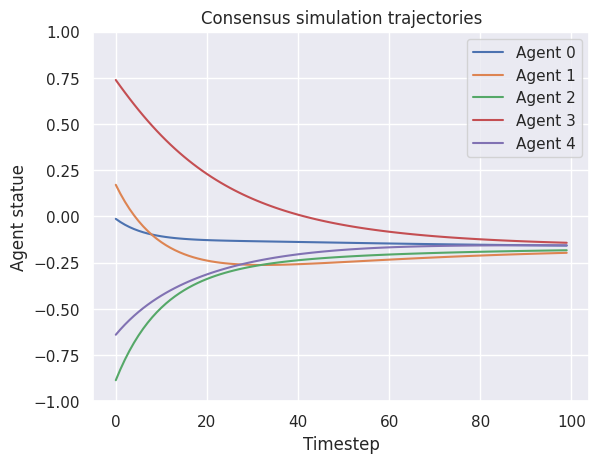

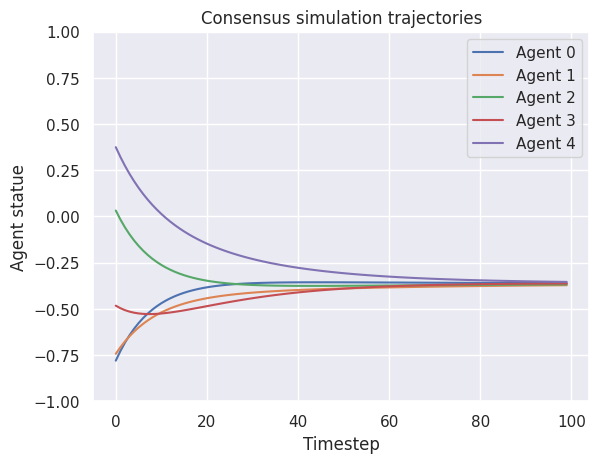

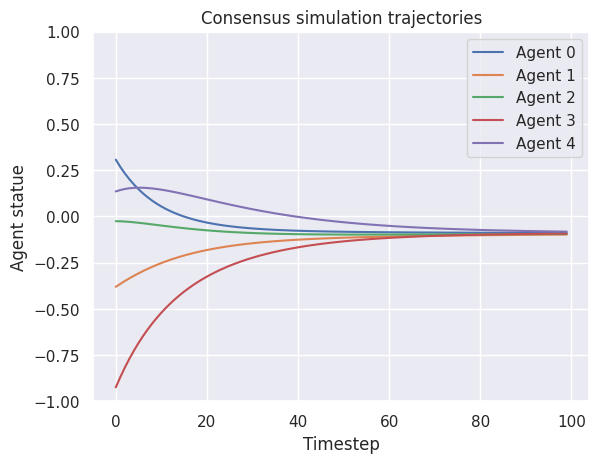

In [15]:
for i in range(5):
    plot_consensus(x[i], config)